In [1]:
import random
import time
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Генерация случайного графа типа Erdos-Renyi
def generate_er_graph(n, p):
    return nx.erdos_renyi_graph(n, p)

# Генерация случайного графа типа Barabasi-Albert
def generate_ba_graph(n, m):
    return nx.barabasi_albert_graph(n, m)

# Генерация случайного графа типа Watts-Strogatz
def generate_ws_graph(n, k, p):
    return nx.watts_strogatz_graph(n, k, p)

In [3]:
# Простой gossip-алгоритм
def simple_gossip_algorithm(graph, start_node):
    infected_nodes = set()
    transferred_info = 0
    prev_transferred_info = 0
    iterations_without_progress = 0

    # start_node = random.choice(list(graph.nodes()))
    infected_nodes.add(start_node)

    num_infected_nodes_history = []
    num_infected_nodes_history.append(len(infected_nodes))

    while True:
        # Получаем список неинфицированных соседей каждого зараженного узла
        non_infected_neighbors = set()
        for infected_node in infected_nodes:
            non_infected_neighbors.update(set(graph.neighbors(infected_node)) - infected_nodes)

        # Если список неинфицированных соседей пуст, прекращаем алгоритм
        if len(non_infected_neighbors) == 0:
            break

        # Выбираем случайного неинфицированного соседа и передаем информацию
        neighbor = random.choice(list(non_infected_neighbors))
        transferred_info += 1
        infected_nodes.add(neighbor)

        num_infected_nodes_history.append(len(infected_nodes))
        if len(infected_nodes) == graph.number_of_nodes():
            break

        if transferred_info == prev_transferred_info:
            iterations_without_progress += 1
        else:
            iterations_without_progress = 0

        if iterations_without_progress >= 10:
            break

        prev_transferred_info = transferred_info

    return len(infected_nodes), transferred_info, num_infected_nodes_history

In [4]:
# Rumor spreading gossip-алгоритм
def rumor_spreading_algorithm(graph, start_node):
    infected_nodes = set()
    transferred_info = 0
    prev_transferred_info = 0
    iterations_without_progress = 0

    # start_node = random.choice(list(graph.nodes()))
    infected_nodes.add(start_node)

    num_infected_nodes_history = []
    num_infected_nodes_history.append(len(infected_nodes))

    while True:

        for infected_node in infected_nodes.copy():
            neighbor = random.choice(list(graph.neighbors(infected_node)))

            if neighbor not in infected_nodes:
                transferred_info += 1
                infected_nodes.add(neighbor)

        
        num_infected_nodes_history.append(len(infected_nodes))
        if len(infected_nodes) == graph.number_of_nodes():
            break

        if transferred_info == prev_transferred_info:
            iterations_without_progress += 1
        else:
            iterations_without_progress = 0

        if iterations_without_progress >= 10:
            break
        
        prev_transferred_info = transferred_info

    return len(infected_nodes), transferred_info, num_infected_nodes_history

In [5]:
# push_pull_algorithm
def push_pull_algorithm(graph, start_node):
    infected_nodes = set()
    transferred_info = 0
    prev_transferred_info = 0
    iterations_without_progress = 0

    # start_node = random.choice(list(graph.nodes()))
    infected_nodes.add(start_node)

    num_infected_nodes_history = []
    num_infected_nodes_history.append(len(infected_nodes))

    while True:
        for infected_node in infected_nodes.copy():
            neighbors = list(graph.neighbors(infected_node))

            # Push
            for neighbor in neighbors:
                if neighbor not in infected_nodes:
                    transferred_info += 1
                    infected_nodes.add(neighbor)
                    # Pull
                    if random.random() < 0.5:
                        transferred_info += 1
                        # infected_nodes.add(neighbor)
                    

            

        num_infected_nodes_history.append(len(infected_nodes))
        if len(infected_nodes) == graph.number_of_nodes():
            break

        if transferred_info == prev_transferred_info:
            iterations_without_progress += 1
        else:
            iterations_without_progress = 0

        if iterations_without_progress >= 10:
            break

        prev_transferred_info = transferred_info
        

    return len(infected_nodes), transferred_info, num_infected_nodes_history

In [6]:
def epidemic_algorithm(graph, start_node):
    infected_nodes = {start_node}
    infected_nodes_history = [len(infected_nodes)]

    # Инициализация состояний узлов в графе
    for node in graph.nodes():
        if node == start_node:
            graph.nodes[node]['state'] = 'I'
            graph.nodes[node]['recovery_time'] = 10  # Время выздоровления установлено на 10 итераций
        else:
            graph.nodes[node]['state'] = 'S'
            graph.nodes[node]['recovery_time'] = 0

    prev_transferred_info = 0
    transferred_info = 0

    # Количество итераций без прогресса
    iterations_without_progress = 0

    while True:
        nodes_to_remove = set()  # Временное множество для удаления узлов
        nodes_to_add = set()
        for infected_node in infected_nodes:
            neighbors = list(graph.neighbors(infected_node))
            # Распространение инфекции на здоровых соседей
            for neighbor in neighbors:
                if graph.nodes[neighbor]['state'] == 'S':
                    transferred_info += 1
                    graph.nodes[neighbor]['state'] = 'I'
                    graph.nodes[neighbor]['recovery_time'] = 1  # Установка времени выздоровления на 10 итераций
                    nodes_to_add.add(neighbor)

            # Уменьшение времени выздоровления зараженных узлов
            graph.nodes[infected_node]['recovery_time'] -= 1
            if graph.nodes[infected_node]['recovery_time'] <= 0:
                graph.nodes[infected_node]['state'] = 'R'
                nodes_to_remove.add(infected_node)  # Добавление узла для удаления

        # Удаление узлов из infected_nodes
        for node in nodes_to_remove:
            infected_nodes.remove(node)

        for node in nodes_to_add:
            infected_nodes.add(node)

        infected_nodes_history.append(len(infected_nodes))

        if len(infected_nodes) == 0:
            break

        # Проверка на прекращение алгоритма
        if transferred_info == prev_transferred_info:
            iterations_without_progress += 1
        else:
            iterations_without_progress = 0

        if iterations_without_progress >= 10:
            break

        prev_transferred_info = transferred_info

    return len(infected_nodes), transferred_info, infected_nodes_history

In [7]:
# Генерация случайных графов и выполнение алгоритмов
num_nodes = 100
er_p = 0.1
ba_m = 2
ws_k = 4
ws_p = 0.4

er_graph = generate_er_graph(num_nodes, er_p)
er_start_node = random.choice(list(er_graph.nodes()))
ba_graph = generate_ba_graph(num_nodes, ba_m)
ba_start_node = random.choice(list(ba_graph.nodes()))
ws_graph = generate_ws_graph(num_nodes, ws_k, ws_p)
ws_start_node = random.choice(list(ws_graph.nodes()))


algorithms = {
    "Simple Gossip": simple_gossip_algorithm,
    "Rumor Spreading": rumor_spreading_algorithm,
    "Epidemic": epidemic_algorithm,
    "Push-Pull": push_pull_algorithm
}

results = {}

In [8]:
for graph_type, graph, start_node in zip(["Erdos-Renyi", "Barabasi-Albert", "Watts-Strogatz"],
                             [er_graph, ba_graph, ws_graph], [er_start_node, ba_start_node, ws_start_node]):
    print(f"Running algorithms on {graph_type} graph...")

    algorithm_results = {}

    for algorithm_name, algorithm in algorithms.items():
        start_time = time.perf_counter()
        num_infected_nodes, transferred_info, num_infected_nodes_history = algorithm(graph, start_node)
        execution_time = time.perf_counter() - start_time

        algorithm_results[algorithm_name] = {
            "num_infected_nodes": num_infected_nodes,
            "transferred_info": transferred_info,
            "num_infected_nodes_history": num_infected_nodes_history,
            "execution_time": execution_time
        }

    results[graph_type] = algorithm_results

Running algorithms on Erdos-Renyi graph...
Running algorithms on Barabasi-Albert graph...
Running algorithms on Watts-Strogatz graph...


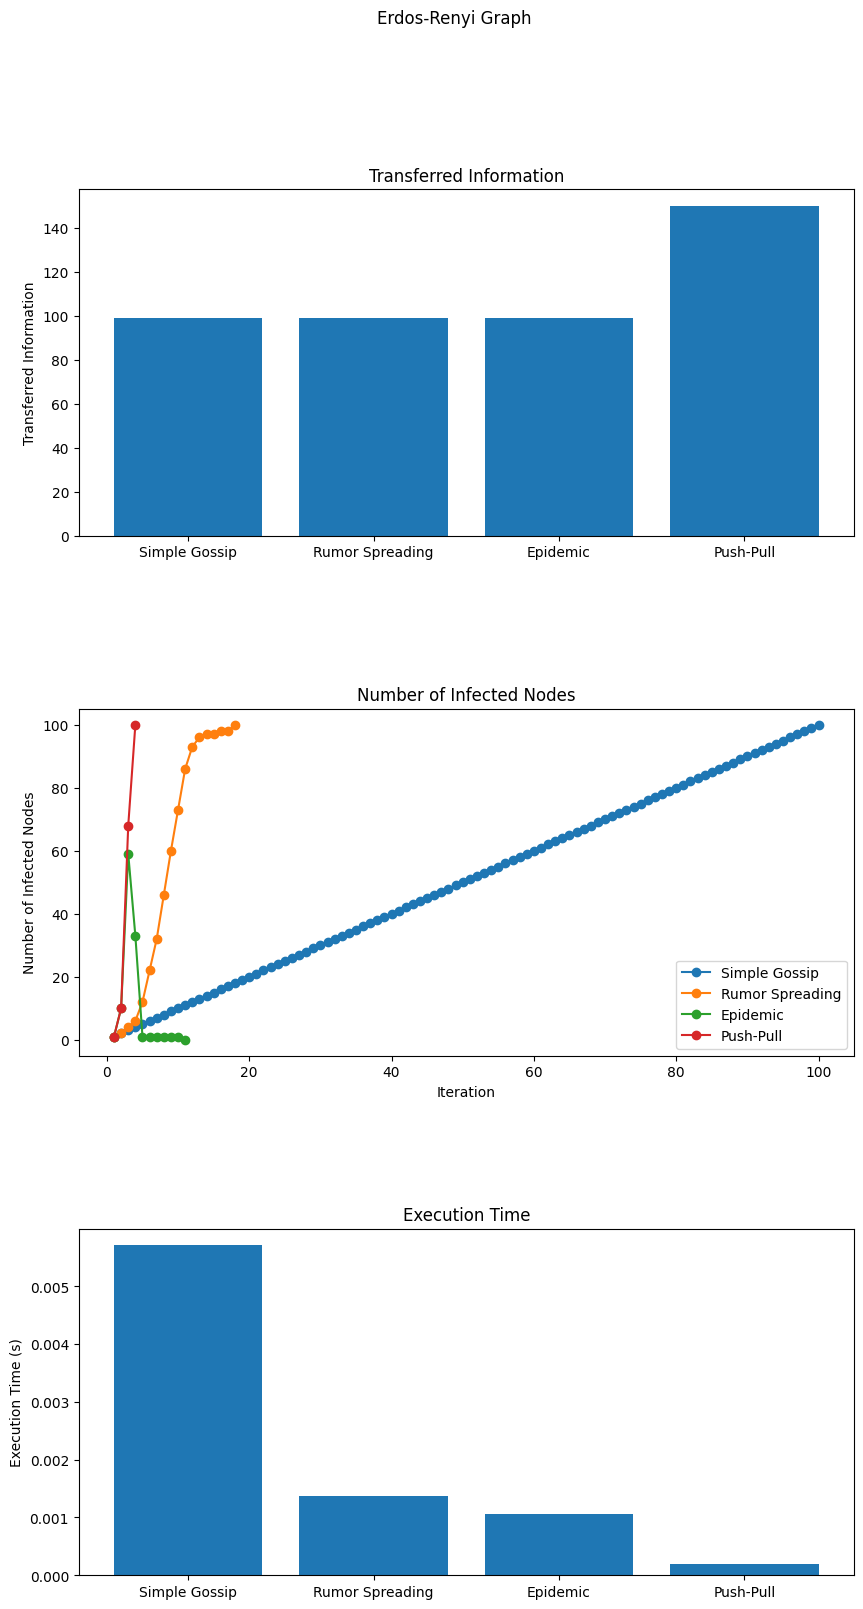

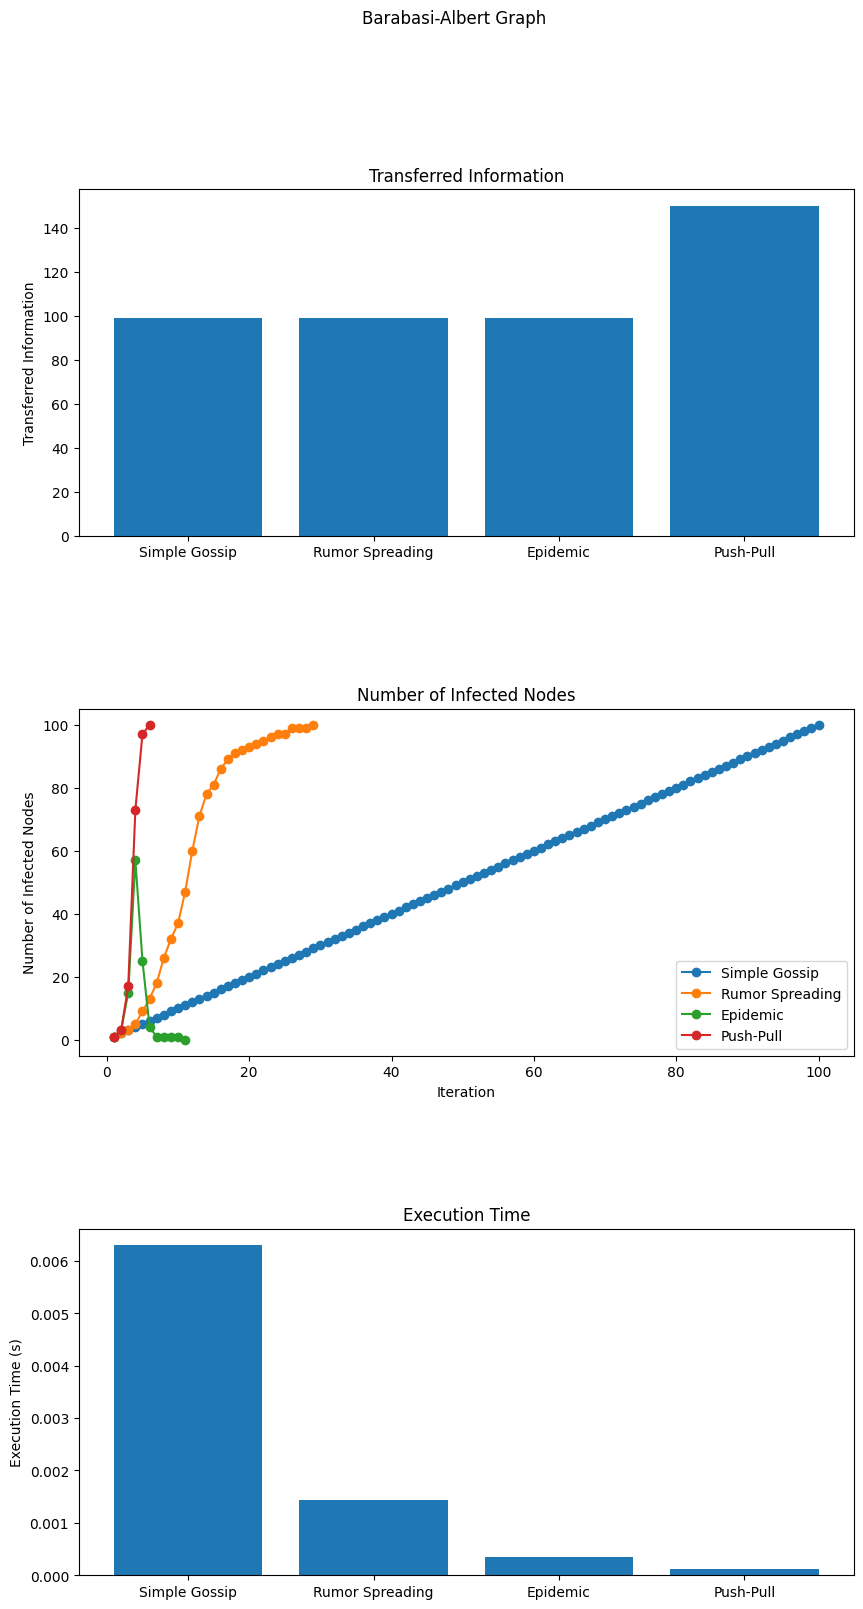

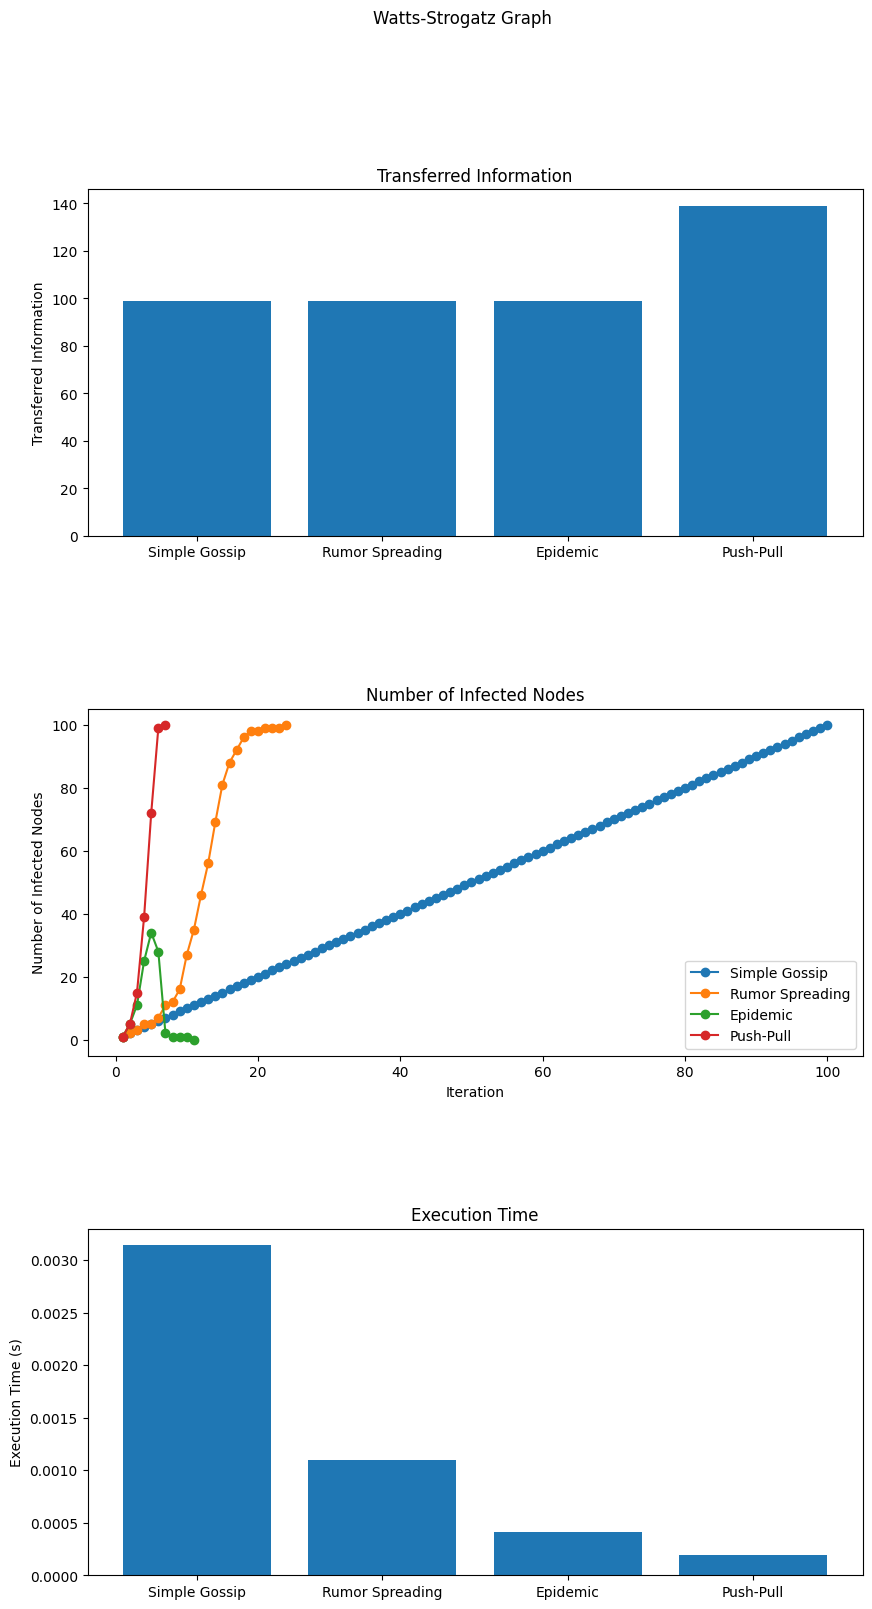

In [9]:
# Визуализация результатов
for graph_type, algorithm_results in results.items():
    fig, axs = plt.subplots(3, figsize=(10, 18), gridspec_kw={'hspace': 0.5})
    fig.suptitle(f"{graph_type} Graph")

    x_values = list(algorithms.keys())

    # График - количество переданной информации
    axs[0].set_title("Transferred Information")
    axs[0].set_ylabel("Transferred Information")
    axs[0].bar(x_values, [data["transferred_info"] for data in algorithm_results.values()])

    # График - количество зараженных узлов после каждой итерации
    axs[1].set_title("Number of Infected Nodes")
    axs[1].set_xlabel("Iteration")
    axs[1].set_ylabel("Number of Infected Nodes")

    # График - время выполнения
    axs[2].set_title("Execution Time")
    axs[2].set_ylabel("Execution Time (s)")
    execution_times = [data["execution_time"] for data in algorithm_results.values()]
    axs[2].bar(x_values, execution_times)

    max_iterations = max([len(data["num_infected_nodes_history"]) for data in algorithm_results.values()])

    for algorithm_name, data in algorithm_results.items():
        num_infected_nodes_per_iteration = data["num_infected_nodes_history"]
        num_iterations = len(num_infected_nodes_per_iteration)
        x_values_algo = range(1, num_iterations + 1)

        axs[1].plot(x_values_algo, num_infected_nodes_per_iteration, marker='o', label=algorithm_name)

    axs[1].legend()

plt.subplots_adjust(hspace=1.0)
plt.show()